<a href="https://colab.research.google.com/github/Sudershan29/Lip_Reading_Deep-Learning/blob/main/June_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## Hardware Settings
---


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

from tensorflow.python.client import device_lib
device_lib.list_local_devices()

Found GPU at: /device:GPU:0


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7150553892217996449, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14509932544
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17017964509700086255
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

'''from google.colab import drive
drive.flush_and_unmount()'''

Mounted at /content/gdrive


'from google.colab import drive\ndrive.flush_and_unmount()'

## **`Packages and Setting`**

In [6]:
import numpy as np 
import pandas as pd
import os
import cv2
import tensorflow as tf
from IPython.display import HTML, SVG
import base64
from base64 import b64encode
import sys
import dlib
import io
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from google.colab.patches import cv2_imshow
from matplotlib import pyplot
from matplotlib.patches import Rectangle
import time
from tqdm import tqdm
try:
  import mtcnn
except:
  !pip install mtcnn
  import mtcnn

try:
  import mediapipe
except:
  !pip install mediapipe

try:
  import np_utils
except:
  !pip install np_utils

try:
  import librosa
except:
  !pip install librosa

try:
  import pydub
except:
  !pip install pydub

import IPython.display as ipd
import mediapipe as mp
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Circle
from PIL import Image as im

import keras
from keras.layers import Dense,Flatten,Activation,Dropout,LSTM,Input 
from keras.layers.wrappers import TimeDistributed
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

from keras import applications, optimizers
from keras.models import Sequential, Model, load_model
import matplotlib.pyplot as plt
import librosa.display

from pydub import AudioSegment
from pydub.silence import split_on_silence
np.random.seed(3)

In [ ]:
#@Traversing through data

for dirname, _, filenames in tqdm(os.walk('/content/gdrive/MyDrive/lombardgrid')):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:

number =0 
for dirname, _, filenames in tqdm(os.walk(path)):
    for filename in filenames:
        number +=1
        #print(os.path.join(dirname, filename))

print('Number of files = '+ str(number))

In [ ]:
"""print("		Directory				Number of files		Size(MB) ")
dir = [] 
files={}
for dirname, _, filenames in os.walk(path):
  dir.append(dirname)
  k=[]
  sum=0
  for i in filenames:
    temp = os.path.join(dirname, i)
    k.append(temp)
    file_size = os.stat(temp)
    sum += file_size.st_size
  files[dirname]=k
  c=str(len(filenames))
  print(dirname + ' '*(58-len(dirname)) + c + " "*(20-len(c))+ str(sum/(1000*1024)))

import pickle 

with open('/content/gdrive/MyDrive/lombardgrid/Pickle/filedirectory', 'wb') as f:
    pickle.dump([dir,files], f)
"""

In [ ]:
path="/content/gdrive/MyDrive/lombardgrid"

with open('/content/gdrive/MyDrive/lombardgrid/Pickle/filedirectory', 'rb') as f:
    dir,files = pickle.load(f)

size=0
for i in files.keys():
  size += len(files[i])

print(size)

16339


In [ ]:
def with_opencv(filename):
    import cv2
    video = cv2.VideoCapture(filename)
    duration = video.get(cv2.CAP_PROP_POS_MSEC)
    frame_count = video.get(cv2.CAP_PROP_FRAME_COUNT)
    return duration, frame_count

In [ ]:
i=dir[2]
test=files[i][4200]
print(files[i][3200])
#print(with_opencv(files[i][3200]))

/content/gdrive/MyDrive/lombardgrid/front/s25_p_pbar1s.mov


In [ ]:
def playvideo(filename):
    video = io.open(filename, 'r+b').read()
    encoded = base64.b64encode(video)
    return HTML(data='''<video alt="test" controls>
                    <source src="data:video/mp4;base64,{0}" type="video/mp4"/>
                 </video>'''.format(encoded.decode('ascii')))

In [ ]:
playvideo(test)

---
#`Face Detection Algorithms`

*   `Haar Cascade-> Not suitable`
*   `MTCNN -> Higher computation`
*   `DLIB`

---                       

## "**One Millisecond Face Alignment with an Ensemble of Regression Trees paper**"

 `by Kazemi and Sullivan (2014).`

In [ ]:
cnn_face_detector = dlib.cnn_face_detection_model_v1('/content/gdrive/MyDrive/lombardgrid/mmod_human_face_detector.dat')

f = '/content/gdrive/MyDrive/lombardgrid/test1.jpg' 
print("Processing file: {}".format(f))
img = dlib.load_rgb_image(f)
dets = cnn_face_detector(img, 1)
print("Number of faces detected: {}".format(len(dets)))
for i, d in enumerate(dets):
  print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} Confidence: {}".format(i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))


Processing file: /content/gdrive/MyDrive/lombardgrid/test1.jpg
Number of faces detected: 1
Detection 0: Left: 150 Top: -1 Right: 502 Bottom: 351 Confidence: 1.0413516759872437


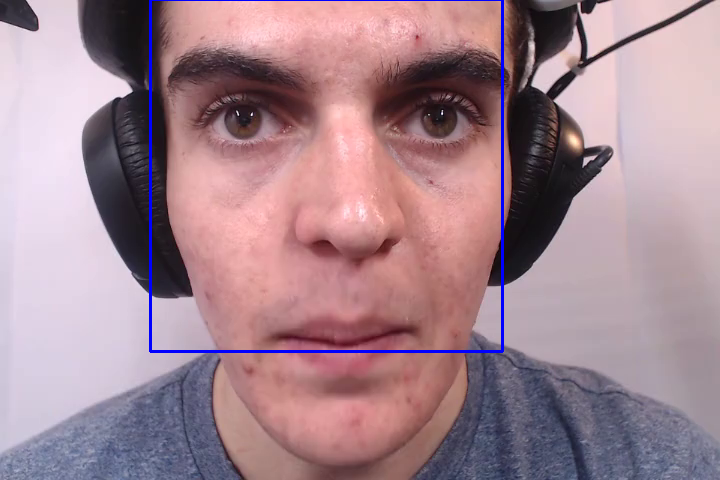

In [ ]:
image = cv2.imread('/content/gdrive/MyDrive/lombardgrid/test1.jpg')
start_point = (d.rect.left(), d.rect.top())
end_point = (d.rect.right(), d.rect.bottom())
color = (255, 0, 0)
thickness = 2
image = cv2.rectangle(image, start_point, end_point, color, thickness)
cv2_imshow(image) 
cv2.destroyAllWindows()



## **“Multi-Task Cascaded Convolutional Neural Network,” or MTCNN**
```
 described by Kaipeng Zhang, et al. in the *2016 paper* titled “Joint Face Detection and Alignment Using Multitask Cascaded Convolutional Networks.”
```
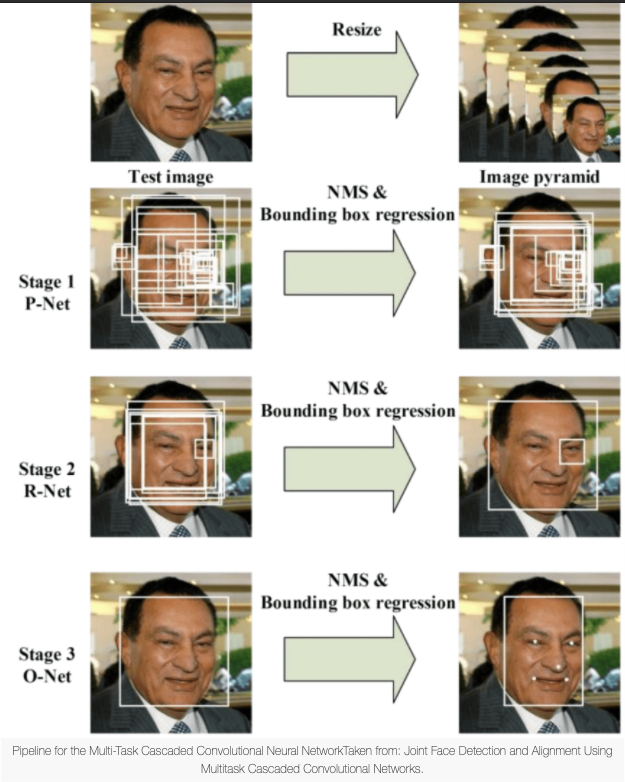

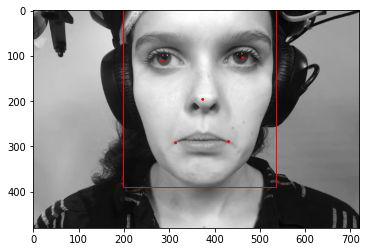

In [ ]:
cap = cv2.VideoCapture(test)
ret, frame = cap.read()
grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#cv2_imshow(grey)
cap.release()
cv2.destroyAllWindows()

def draw_image_with_boxes(data, result_list):
  pyplot.imshow(data)
  ax = pyplot.gca()
  for result in result_list:
    x, y, width, height = result['box']
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    ax.add_patch(rect)
    for key, value in result['keypoints'].items():
      dot = Circle(value, radius=2, color='red')
      ax.add_patch(dot)
  pyplot.show()

pixels=np.array([grey.T,grey.T,grey.T]).T
detector = MTCNN()
faces = detector.detect_faces(pixels)
draw_image_with_boxes(pixels, faces)

In [ ]:
print(faces)
print("\n\nCoordinates of mouth")
print(faces[0]['keypoints']['mouth_left'])
print(faces[0]['keypoints']['mouth_right'])

[{'box': [197, -39, 338, 428], 'confidence': 0.9990286827087402, 'keypoints': {'left_eye': (285, 110), 'right_eye': (462, 104), 'nose': (374, 196), 'mouth_left': (314, 292), 'mouth_right': (431, 289)}}]


Coordinates of mouth
(314, 292)
(431, 289)


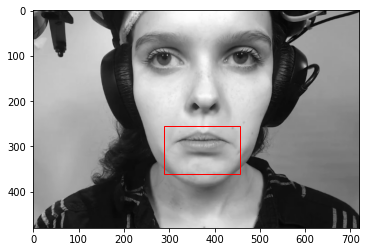

288 254 169 107


In [ ]:
def draw_mouth(data, result_list,passing=False):
  if(passing):
    pyplot.imshow(data)
    ax = pyplot.gca()
  for i in range(len(result_list)):
    x1, y1, width, height = result_list[i]['box']
    c=result_list[i]['keypoints']
    x1, y1 = c['mouth_left']
    x2, y2 = c['mouth_right']
    x, y = (x1+x2)/2, (y1+y2)/2
    rect = Rectangle((x- width/4, y-height/12), width/2, height/4, fill=False, color='red')
    if(passing):
      ax.add_patch(rect)
  if(passing):
    pyplot.show()
  return (int(x- width/4), int(y-height/12), int(width/2), int(height/4))

a,b,c,d= draw_mouth(pixels,faces,True)
print(a,b,c,d)

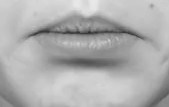

In [ ]:
# TESTING HOW IT WORKS
tf.get_logger().setLevel('ERROR')

cap = cv2.VideoCapture(files[dir[2]][4200])
ctr=0
'''while(cap.isOpened()):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray)
    ctr += 1
    if(ctr >5):
      break'''
ret, frame = cap.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#cv2_imshow(gray)
pixels=np.array([gray.T,gray.T,gray.T]).T
detector = MTCNN()
faces = detector.detect_faces(pixels)
a,b,c,d=draw_mouth(gray,faces)
cropped = gray[b:b+d, a:a+c]
cv2_imshow(cropped)
data = im.fromarray(cropped)
data.save(path+'/'+'gfg_dummy_pic.png')
cap.release()
cv2.destroyAllWindows()

## **BlazeFace: Sub-millisecond Neural Face Detection on Mobile GPUs**

`Valentin Bazarevsky Yury Kartynnik`

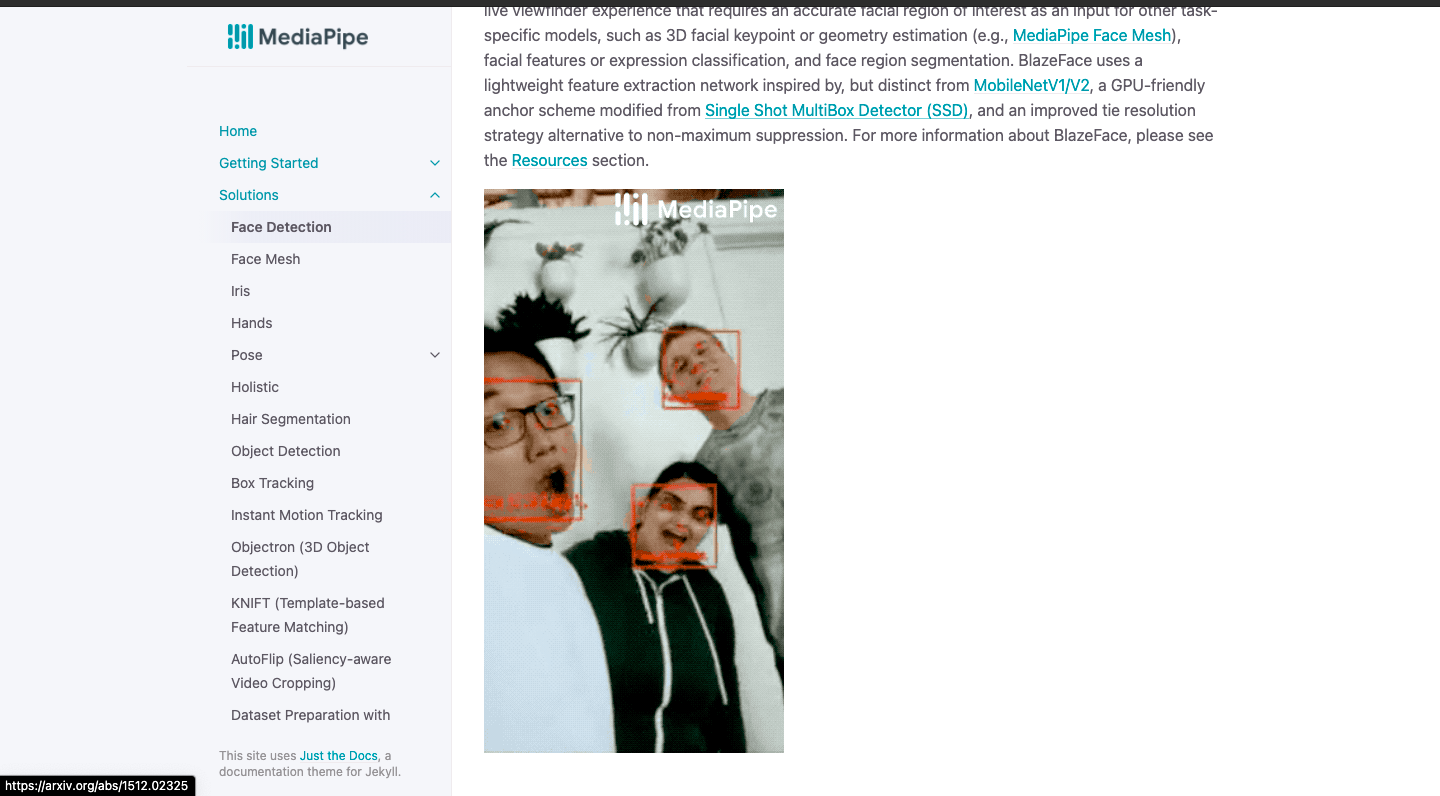

In [ ]:
def cropping_mediapipe(image, show=False):

  mp_face_detection = mp.solutions.face_detection
  mp_drawing = mp.solutions.drawing_utils

  with mp_face_detection.FaceDetection(
      min_detection_confidence=0.5) as face_detection:
      ctr=1
      while True:
        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = face_detection.process(image)  
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.detections:
          for detection in results.detections:
            mp_drawing.draw_detection(image, detection)
        #cv2_imshow(image)
        ctr +=1
        if(ctr !=1):
            break

  mouth_x = int((mp_face_detection.get_key_point( detection, mp_face_detection.FaceKeyPoint.MOUTH_CENTER)).x*image.shape[1])
  mouth_y = int((mp_face_detection.get_key_point( detection, mp_face_detection.FaceKeyPoint.MOUTH_CENTER)).y*image.shape[0])

  lefteye_x = mp_face_detection.get_key_point( detection, mp_face_detection.FaceKeyPoint.LEFT_EYE).x
  righteye_x = mp_face_detection.get_key_point( detection, mp_face_detection.FaceKeyPoint.RIGHT_EYE).x

  nose_y = mp_face_detection.get_key_point( detection, mp_face_detection.FaceKeyPoint.NOSE_TIP).y

  height_m = mouth_y -int(nose_y*image.shape[0]) 
  width_m =(lefteye_x - righteye_x)* image.shape[1]
  if(show==True):
    pyplot.imshow(image)
    ax = pyplot.gca()
    rect = Rectangle((mouth_x - width_m*0.9 ,mouth_y - height_m), width_m*2,height_m*2, fill=False, color='red')
    ax.add_patch(rect)
    pyplot.show()
  return int(mouth_x - width_m*0.9),int(mouth_y - height_m), int(width_m*2),int(height_m*2)

print(cropping_mediapipe(frame),True)

(200, 216, 305, 150) True


# **`Dataset tuning `**

## ` Preparing for Arranging `

In [ ]:
'''old_path ="/content/gdrive/MyDrive/lombardgrid"

directory = "onlymouth"

path = os.path.join(old_path, directory)

os.mkdir(path)
print("Directory '% s' created" % directory)

old_path ="/content/gdrive/MyDrive/lombardgrid/onlymouth"

for i in tqdm(range(1,52)):
  directory= 's'+str(i)
  new_path = os.path.join(old_path, directory)
  if not os.path.exists(new_path):
      os.makedirs(new_path)'''

In [ ]:
testing = files[dir[2]][486]

#for i in files.keys():
#  if "/content/gdrive/MyDrive/lombardgrid/front/s5_p_pbae8p_WRONG_pbae8p.mov" in files[i]:
#    print(i,files[i].index("/content/gdrive/MyDrive/lombardgrid/front/s5_p_pbae8p_WRONG_pbae8p.mov"))

def return_main_path(testing,sendname=False):
  origin = "/content/gdrive/MyDrive/Lombardgrid_onlymouth/onlymouth"
  directory = ((testing.split('/')[-1]).split('_'))[0]
  saving_name = (((testing.split('/')[-1]).split('_'))[1]+ '_' +((testing.split('/')[-1]).split('_'))[2]).split('.')[0]

  saving_directory = os.path.join(origin, directory)
  saving_there=os.path.join(saving_directory, saving_name)
  if(sendname==True):
    return [saving_there,directory]
  return saving_there

return_main_path(testing,True)

['/content/gdrive/MyDrive/Lombardgrid_onlymouth/onlymouth/s5/p_pbae8p', 's5']

## `Cropping the Dataset`

In [ ]:
#TESTING EVERYTHING
old_path ="/content/gdrive/MyDrive/lombardgrid"

directory = "test_saving"

path = os.path.join(old_path, directory)

if not os.path.exists(path):
  os.makedirs(path)

print(path)
print("Directory '% s' created" % directory)

In [ ]:
def creating_mouth_crops(filename,path,graph=False):
  cap = cv2.VideoCapture(filename)
  ctr=0
  if(graph==True):
    pbar = tqdm(total=100)
  total_frames = with_opencv(filename)[1]

  while(cap.isOpened()):
      ctr +=1
      ret, frame = cap.read()
      if(ret==True):
        a1,b1,c1,d1=cropping_mediapipe(frame)
        cropped = frame[b1:b1+d1, a1:a1+c1]
        gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
        if(ctr==1 and graph==True):
          cv2_imshow(gray)
        data = im.fromarray(gray)
        data.save(path+'/'+str(ctr)+'.png')
        if(graph==True):
          pbar.update(100/total_frames)
      else:
        break

  if(graph==True):
    pbar.close()
  cap.release()
  cv2.destroyAllWindows()

#creating_mouth_crops(files[dir[2]][4100],path)

In [ ]:
"""count = 0
for i in range(0,len(files[dir[2]])):
  now =files[dir[2]][i]
  path,speaker_name=return_main_path(now,True)
  speaker_number = int(speaker_name[1:])
  if speaker_number == 1 or speaker_number == 2 or (speaker_number >24 and speaker_number<41):
    count+=1
print(count)"""

In [ ]:
for i in tqdm(range(0,len(files[dir[2]]))):
  now =files[dir[2]][i]
  path,speaker_name=return_main_path(now,True)
  speaker_number = int(speaker_name[1:])
  if speaker_number == 1 or speaker_number == 2 or (speaker_number >24 and speaker_number<41):
    if not os.path.exists(path):
      os.makedirs(path)
    creating_mouth_crops(now,path)

In [ ]:
dic={}
for i in range(2230,len(files[dir[2]])):
  t=files[dir[2]][i].split('/')[-1].split('_')[0]
  if t in dic.keys():
    dic[t]+=1
  else:
    dic[t]=0
  if((i == len(files[dir[2]])-1 )and i!=0):
    print("Turn number "+ str(i))
    print(dic)
    print(len(dic.keys()))
    dic={}

In [ ]:
c=0
for i in range(1,56):
  count = 0
  for j in range(0,len(files[dir[2]])):
   if "s"+str(i)+"_" in files[dir[2]][j]:
    #print(files[dir[2]][i])
    count +=1
  print("s"+str(i)+':'+ str(count))
  if(count!=0):
    c+=1
  count=0
print("Total number of speakers is:" + str(c))

In [ ]:
"""
These are six-letter words.

For example “bin blue at A 2 please,” with the following structure:
 
<command: bin, lay, place, set> - 4  - 15 frames
<color: blue, green, red, white> - 4 - 15 frames
<preposition: at, by, in, with> - 4
<letter: A–Z (excluding W)> - 25 
<digit: 0–9> - 10
<adverb: again, now, please, soon>.  - 4 


Each talker in the corpus produced a unique sentence list,

except
for talkers #6 and #29,
and talkers #25 and #26,

where, in each of these pairs, the pair read the same sentence list.
"""

In [ ]:
min=100
max=0
avg = 0
for i in tqdm(range(0,2000)):
  c=with_opencv(files[dir[2]][i])[1]
  avg +=c
  if(c<min):
    min=c
  if(c>max):
    max=c

In [ ]:
print(max,min,avg/2000)

## `Audio testing`

In [ ]:
audio_data = files[dir[4]][5055]
x , sr = librosa.load(audio_data)
ipd.Audio(audio_data)

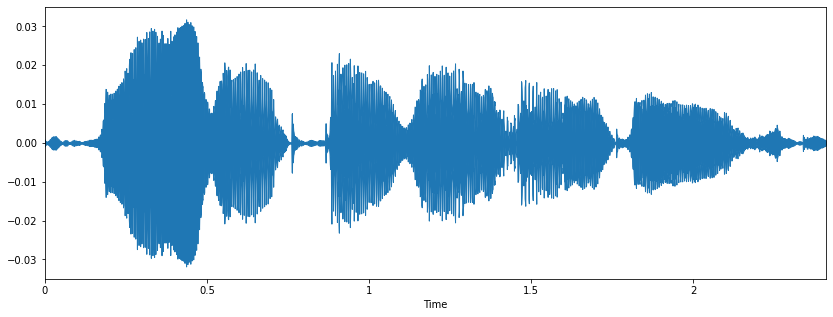

In [ ]:
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

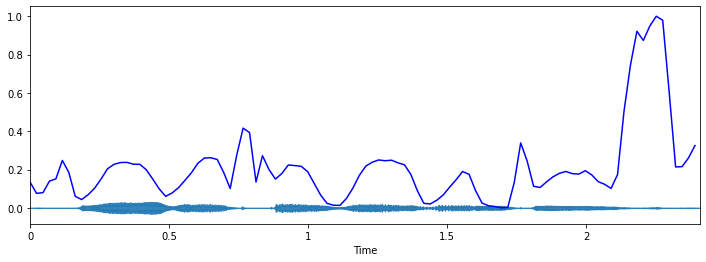

In [ ]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]

# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.9)
plt.plot(t, normalize(spectral_centroids), color='b')

In [ ]:
from pydub import AudioSegment
from pydub.silence import split_on_silence


def match_target_amplitude(aChunk, target_dBFS):

    change_in_dBFS = target_dBFS - aChunk.dBFS
    return aChunk.apply_gain(change_in_dBFS)


song = AudioSegment.from_mp3(audio_data)

chunks = split_on_silence (song, min_silence_len = 100, silence_thresh = -16)

print(chunks)

In [ ]:
def transcribe_gcs_with_word_time_offsets(gcs_uri):
    """Transcribe the given audio file asynchronously and output the word time
    offsets."""
    client = speech.SpeechClient()

    audio = speech.RecognitionAudio(uri=gcs_uri)
    config = speech.RecognitionConfig(
        encoding=speech.RecognitionConfig.AudioEncoding.FLAC,
        sample_rate_hertz=16000,
        language_code="en-US",
        enable_word_time_offsets=True,
    )

    operation = client.long_running_recognize(config=config, audio=audio)

    print("Waiting for operation to complete...")
    result = operation.result(timeout=90)

    for result in result.results:
        alternative = result.alternatives[0]
        print("Transcript: {}".format(alternative.transcript))
        print("Confidence: {}".format(alternative.confidence))

        for word_info in alternative.words:
            word = word_info.word
            start_time = word_info.start_time
            end_time = word_info.end_time

            print(
                f"Word: {word}, start_time: {start_time.total_seconds()}, end_time: {end_time.total_seconds()}"
            )

from pydub import AudioSegment
from pydub.silence import split_on_silence

sound_file = AudioSegment.from_wav(audio_data)

transcribe_gcs_with_word_time_offsets(sound_file)

## **`Let the training begin`**

In [2]:
timestep = 15
n_labels = 51
learning_rate = 0.0001
batch_size = 32
validation_ratio=0.2
num_epoch = 10
img_col = 224
img_row = 224
img_channel = 3

In [3]:
"""
<command: bin, lay, place, set> - 4  - 15 frames
<color: blue, green, red, white> - 4 - 15 frames
<preposition: at, by, in, with> - 4
<letter: A–Z (excluding W)> - 25 
<digit: 0–9> - 10
<adverb: again, now, please, soon>.  - 4 

"""
index1={'b':0,'l':1,'p':2,'s':3}
index2={'b':4,'g':5,'r':6,'w':7}
index3={'a':8,'b':9,'i':10,'w':11}

index4={}
for i in range(97,97+26):
  index4[chr(i)]=12+i-97


index5={}
index5['z']=38
for i in range(ord('0'),ord('9')+1):
  index5[chr(i)]=38+i-48


index6={'a':48,'n':49,'p':50,'s':51}

In [4]:
def coded(c,i):
  if i==0:
    if c in index1:
      return index1[c]
    else:
      return 52
  elif i ==1:
    if c in index2:
      return index2[c]
    else:
      return 52
  elif i ==2:
    if c in index3:
      return index3[c]
    else:
      return 52
  elif i ==3:
    if c in index4:
      return index4[c]
    else:
      return 52
  elif i ==4:
    if c in index5:
      return index5[c]
    else:
      return 52
  elif i ==5:
   if c in index6:
      return index6[c]
   else:
      return 52

In [7]:
import os.path
from os import path

Totalnb = 0
#ordername={}
label=[]
#data=[]
starting_frame = [1,15,25,35,40,50]
ending_frame = [16,30,40,50,55,65]


for i in (range(2,2+5)): #55
   if ( i==0): #if you wanna skip speakers
     continue
   else: 
    nb=0
    ctr=1
    temp_name=[]
    for root, dirs, files in os.walk('/content/gdrive/MyDrive/Lombardgrid_onlymouth/onlymouth/s'+str(i)):
      for name in dirs:
        temp_name.append(name)
        nb=nb+1
      if(nb==0):
        ctr=0
    #ordername['s'+str(i)]=temp_name
    print(i,"Label Number of Dataset is",nb)
    Totalnb +=nb
    if(ctr):
      for j in tqdm(temp_name):
        for times in range(6):
          #temp = []
          #for k in range(starting_frame[times],ending_frame[times]):
            #name = '/content/gdrive/MyDrive/Lombardgrid_onlymouth/onlymouth/s'+str(i)+'/'+j+'/'+str(k)+'.png'
            #if(path.isfile(name)):
              #img=cv2.imread(name)
            #res=cv2.resize(img,dsize=(img_col,img_row),interpolation=cv2.INTER_CUBIC)
            #temp.append(res)
          #data.append(temp)
          label.append(coded(j[times+2],times))

print("\nTotal Number of data is",Totalnb)

100%|██████████| 100/100 [00:00<00:00, 26040.26it/s]
0it [00:00, ?it/s]

2 Label Number of Dataset is 100
3 Label Number of Dataset is 0



100%|██████████| 41/41 [00:00<00:00, 17980.60it/s]

4 Label Number of Dataset is 41



100%|██████████| 100/100 [00:00<00:00, 31789.48it/s]

5 Label Number of Dataset is 100



100%|██████████| 100/100 [00:00<00:00, 143346.00it/s]

6 Label Number of Dataset is 100

Total Number of data is 341


In [ ]:
import pickle 

with open('/content/gdrive/MyDrive/lombardgrid/Pickle/5speakers_allframes.pickle', 'wb') as f:
    pickle.dump([data, ordername], f) 

In [8]:
with open('/content/gdrive/MyDrive/lombardgrid/Pickle/5speakers_allframes.pickle', 'rb') as f:
    data, ordername = pickle.load(f)

In [ ]:
for i in range(0,len(label)):
  if(label[i]==52):
    print(i)

print(ordername['s2'])
print(label[46])

In [ ]:
"""label=[]
words = {'s':0,'p':1,'l':2,'b':3}
for i in ordername.keys():
  for j in ordername[i]:
    name = j.split('_')[1]
    name = name[0]
    if(name in words.keys()):
      label.append(words[name])
    else:
      if name =='p':
        label.append(words['s'])
      elif name == '5':
        label.append(words['p'])"""
label = np.array(label)
train_data = np.array(data,dtype='object')

In [ ]:
from tensorflow.keras.utils import to_categorical
from numpy import array

train_label = to_categorical(array(label))
print("Training data size  = ", train_data.shape)
print("Training labels  = ", train_label.shape)

Training data size  =  (2046,)
Training labels  =  (2046, 52)


In [ ]:
"""import pickle 

with open('/content/gdrive/MyDrive/lombardgrid/Pickle/Allspeakers_TrainLabel_10frames.pickle', 'wb') as f:
    pickle.dump([train_data, train_label], f)"""

In [17]:
for i in data[0:10]:
  print(np.array(i).shape)

(14, 224, 224, 3)
(15, 224, 224, 3)
(15, 224, 224, 3)
(15, 224, 224, 3)
(15, 224, 224, 3)
(15, 224, 224, 3)
(14, 224, 224, 3)
(15, 224, 224, 3)
(15, 224, 224, 3)
(15, 224, 224, 3)


In [10]:
train_data = np.array(train_data)
print(train_data.shape)

(2046,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
with open('/content/gdrive/MyDrive/lombardgrid/Pickle/Allspeakers_TrainLabel_10frames.pickle', 'rb') as f:
    train_data, train_label = pickle.load(f)

print("Training data size  = ", train_data.shape)
print("Training labels  = ", train_label.shape)

In [ ]:
x=np.arange(train_label.shape[0])
np.random.shuffle(x)

Totalnb = train_data.shape[0]
train_label = train_label[x]
train_data = train_data[x]

X_train=train_data[0:int(Totalnb*0.8),:]
Y_train=train_label[0:int(Totalnb*0.8)]

X_test= train_data[int(Totalnb*0.8): Totalnb,:]
Y_test = train_label[int(Totalnb*0.8): Totalnb]

# `Training`


## **Lip Net Architecture**

```
(https:// https://arxiv.org/pdf/1611.01599.pdf)
```


In [ ]:
video = Input(shape=(timestep,img_col,img_row,img_channel))
model = applications.MobileNet(input_shape=(img_col,img_row,img_channel), weights="imagenet", include_top=False)
model.trainable = False

x = model.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.3)(x)
cnn_out = Dense(128, activation="relu")(x)

Lstm_inp = Model(inputs= model.input, outputs= cnn_out)

encoded_frames = TimeDistributed(Lstm_inp)(video)

encoded_sequence = LSTM(256)(encoded_frames)
hidden_Drop = Dropout(0.3)(encoded_sequence)
hidden_layer = Dense(128, activation="relu")(encoded_sequence)
outputs = Dense(n_labels, activation="softmax")(hidden_layer)

model = Model([video], outputs)

adam = keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

model.summary()

In [ ]:
hist = model.fit(X_train, Y_train, batch_size= batch_size,validation_split=0.2,shuffle=True,epochs=5)

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
test_data= X_test
test_label = Y_test
print("Testing data size  = ", test_data.shape)
print("Testing labels  = ", test_label.shape)

In [ ]:

print("Evaluate on test data")
results = model.evaluate(test_data, test_label, batch_size=32)
print("test loss, test acc:", results)

print("Generate predictions for 3 samples")
predictions = model.predict(test_data[:3])
print("predictions", predictions)

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')  
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')  
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [ ]:
"""model.save('/content/gdrive/MyDrive/lombardgrid/Pickle/First10Frame_Model_15epoch.h5')"""

In [ ]:
model = keras.models.load_model('/content/gdrive/MyDrive/lombardgrid/Pickle/First10Frame_Model_15epoch.h5')

## **New Architecture**

`Testing`

In [ ]:
nb=0
ctr=1
loop=0
i=2
data=[]
label=[]
temp_name=[]
for root, dirs, files in os.walk('/content/gdrive/MyDrive/Lombardgrid_onlymouth/onlymouth/s'+str(i)):
  for name in dirs:
    temp_name.append(name)
    nb=nb+1
    if(nb==0):
      ctr=0
ordername['s'+str(i)]=temp_name
print("\n",i,"Label Number of Dataset is",nb)
Totalnb +=nb
if(ctr):
  for j in tqdm(temp_name):
    loop +=1
    if loop>2:
      break
    for times in range(6):
      temp = []
      for k in range(starting_frame[times],ending_frame[times]):
        name = '/content/gdrive/MyDrive/Lombardgrid_onlymouth/onlymouth/s'+str(i)+'/'+j+'/'+str(k)+'.png'
        if(path.isfile(name)):
          img=cv2.imread(name)
        res=cv2.resize(img,dsize=(img_col,img_row),interpolation=cv2.INTER_CUBIC)
        temp.append(res)
      data.append(temp)
      label.append(coded(j[times+2],times))




  0%|          | 0/100 [00:00<?, ?it/s]


 2 Label Number of Dataset is 100





  1%|          | 1/100 [00:00<00:26,  3.73it/s]


  2%|▏         | 2/100 [00:00<00:27,  3.59it/s]


In [ ]:
print(label)

[1, 6, 11, 19, 41, 50, 2, 6, 10, 22, 39, 48]
